In [63]:
import pandas as pd
import numpy as np

In [2]:
#Load combined dataset
combined_data = pd.read_csv("combined_stats.csv")
combined_data

,game_id,season,week,temp,wind,calendar_week,focus_team,focus_score,focus_temp_delta,avg_temp,attempts,carries,passing_epa,rushing_epa,conventional_plays_ran,pass_to_run_ratio
0,2015_01_PIT_NE,2015,1,65.0,7.0,37,NE,28,-1.093469,66.093469,32,24,15.961351,-0.252627,56,1.333333
1,2015_01_IND_BUF,2015,1,56.0,15.0,37,BUF,27,-9.687551,65.687551,19,36,9.972638,-2.539012,55,0.527778
2,2015_01_GB_CHI,2015,1,72.0,11.0,37,CHI,23,2.529143,69.470857,36,33,0.229273,7.547915,69,1.090909
3,2015_01_KC_HOU,2015,1,70.0,0.0,37,HOU,20,0.000000,70.000000,47,21,-6.469611,-4.144401,68,2.238095
4,2015_01_CAR_JAX,2015,1,77.0,7.0,37,JAX,9,-2.510000,79.510000,40,21,-15.522407,-0.896787,61,1.904762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,2024_18_KC_DEN,2024,18,28.0,5.0,1,KC,0,-1.048000,29.048000,17,11,-10.174690,-4.639490,28,1.545455
4900,2024_18_SEA_LA,2024,18,70.0,0.0,1,SEA,30,27.069714,42.930286,27,24,9.838861,2.883957,51,1.125000
4901,2024_18_LAC_LV,2024,18,70.0,0.0,1,LAC,34,0.000000,70.000000,36,35,17.740903,-0.007130,71,1.028571
4902,2024_18_MIA_NYJ,2024,18,34.0,10.0,1,MIA,20,-35.752527,69.752527,41,23,-6.921629,1.915941,64,1.782609


In [64]:
combined = combined_data.dropna(subset=["focus_temp_delta","avg_temp"]) # TODO dropping null rows (STL, OAK, and SD without data) for now 


combined["total_epa"] = combined["passing_epa"] + combined["rushing_epa"] # Adding Total EPA to analyze
combined

C:\Users\erana\AppData\Local\Temp\ipykernel_38504\2601269701.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["total_epa"] = combined["passing_epa"] + combined["rushing_epa"] # Adding Total EPA to analyze


,game_id,season,week,temp,wind,calendar_week,focus_team,focus_score,focus_temp_delta,avg_temp,attempts,carries,passing_epa,rushing_epa,conventional_plays_ran,pass_to_run_ratio,total_epa
0,2015_01_PIT_NE,2015,1,65.0,7.0,37,NE,28,-1.093469,66.093469,32,24,15.961351,-0.252627,56,1.333333,15.708723
1,2015_01_IND_BUF,2015,1,56.0,15.0,37,BUF,27,-9.687551,65.687551,19,36,9.972638,-2.539012,55,0.527778,7.433625
2,2015_01_GB_CHI,2015,1,72.0,11.0,37,CHI,23,2.529143,69.470857,36,33,0.229273,7.547915,69,1.090909,7.777188
3,2015_01_KC_HOU,2015,1,70.0,0.0,37,HOU,20,0.000000,70.000000,47,21,-6.469611,-4.144401,68,2.238095,-10.614012
4,2015_01_CAR_JAX,2015,1,77.0,7.0,37,JAX,9,-2.510000,79.510000,40,21,-15.522407,-0.896787,61,1.904762,-16.419194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,2024_18_KC_DEN,2024,18,28.0,5.0,1,KC,0,-1.048000,29.048000,17,11,-10.174690,-4.639490,28,1.545455,-14.814180
4900,2024_18_SEA_LA,2024,18,70.0,0.0,1,SEA,30,27.069714,42.930286,27,24,9.838861,2.883957,51,1.125000,12.722818
4901,2024_18_LAC_LV,2024,18,70.0,0.0,1,LAC,34,0.000000,70.000000,36,35,17.740903,-0.007130,71,1.028571,17.733773
4902,2024_18_MIA_NYJ,2024,18,34.0,10.0,1,MIA,20,-35.752527,69.752527,41,23,-6.921629,1.915941,64,1.782609,-5.005688


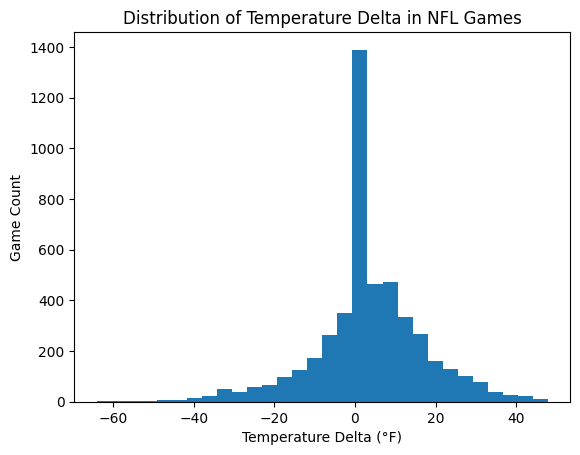

In [65]:
import matplotlib.pyplot as plt

#General plot visualizaing temperature delta distribution
plt.hist(combined["focus_temp_delta"], bins=30)
plt.xlabel("Temperature Delta (°F)")
plt.ylabel("Game Count")
plt.title("Distribution of Temperature Delta in NFL Games")
plt.show()

# Temp Delta vs Scoring

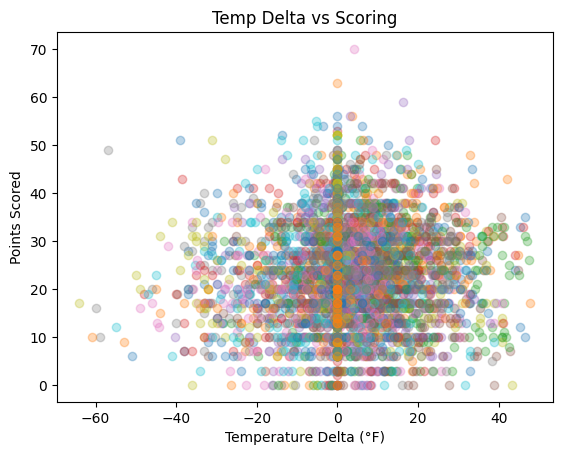

In [66]:
teams = combined["focus_team"].unique() # Team list

plt.figure()
for team in teams:
    tdf = combined[combined["focus_team"] == team]
    plt.scatter(tdf["focus_temp_delta"], tdf["focus_score"], alpha=0.3, label=team)

plt.xlabel("Temperature Delta (°F)")
plt.ylabel("Points Scored")
plt.title("Temp Delta vs Scoring")
plt.show()


Lets focus on few teams, to get a good picture of what may be going on with few teams

Buffalo Bills (BUF) play in an open air stadium and typically face snow and instense wind. They are a good example of a team with extreme weather effects.

San Fran 49ers (SF) play in an open air stadium with more milder conditions, some wind, but no extreme snow or cold like Bills. They can be an example of a team with medium weather effects.

Dallas Cowboys (DAL) play in a closed stadium, therefore having negligble weather effects. They will be our example of a team with relatively small weather effects.

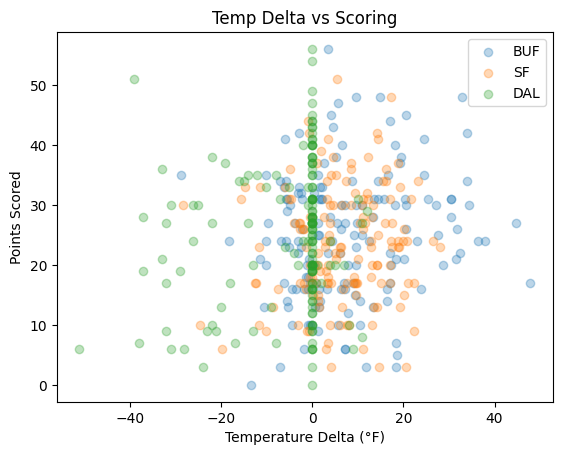

In [67]:
team_focus = ["BUF", "SF", "DAL"] # Focusing on few teams

plt.figure()
for team in team_focus:
    tdf = combined[combined["focus_team"] == team]
    plt.scatter(tdf["focus_temp_delta"], tdf["focus_score"], alpha=0.3, label=team)

plt.xlabel("Temperature Delta (°F)")
plt.ylabel("Points Scored")
plt.title("Temp Delta vs Scoring")
plt.legend()
plt.show()

-- TODO Improve analysis
- BUF had more + temp delta games, SF ~ even dist of temp delta games, and DAL had more - temp delta games
- BUF looks to play better at higher temp deltas
- SF and DAL seem roughly the same across deltas


We can bucket the different temperature deltas into bins to get a better picture of what the average score was of teams vs the average temp delta (bucketed)
To examine if there is overall trend over the entire dataset of how teams performed compared to the temp delta

C:\Users\erana\AppData\Local\Temp\ipykernel_38504\2397555034.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  points_by_temp = combined.groupby(temp_bins)["focus_score"].mean()


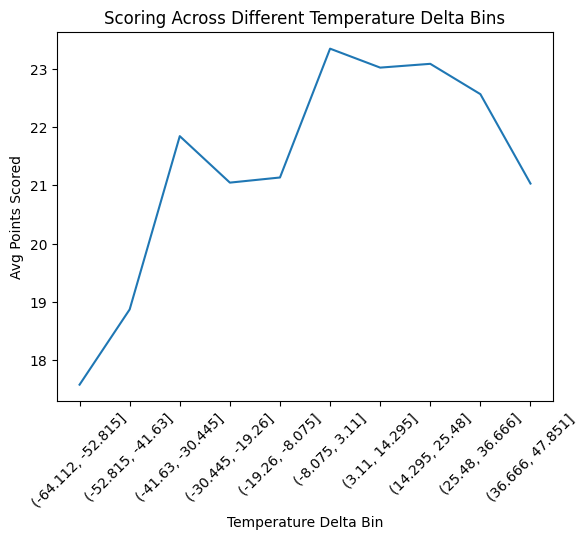

In [74]:
temp_bins = pd.cut(combined["focus_temp_delta"], bins=10)

points_by_temp = combined.groupby(temp_bins)["focus_score"].mean()

plt.plot(points_by_temp.index.astype(str), points_by_temp.values)
plt.xticks(rotation=45)
plt.xlabel("Temperature Delta Bin")
plt.ylabel("Avg Points Scored")
plt.title("Scoring Across Different Temperature Delta Bins")
plt.show()

-- TODO Improve analysis
As we can see there is a general positive correlation between temperature delta and points scored by the team.
As teams played in warmer weather compared to what they are used to they performed better offensively, scoring more points.

# Passing EPA vs Wind Buckets

What about another weather condition like the wind? How did this impact play calls and performance?

In windy conditions it would be expected to hinder teams passing performance, is this true?

In [ ]:
# Get unique wind values to create buckets
wind_unique = np.sort(combined["wind"].dropna().unique())

# Three buckets for wind: low, medium and high wind
wind_tertiles = np.quantile(wind_unique, [0.33, 0.66])
print("Wind tertiles:")
print(wind_tertiles)

# Create wind buckets
combined["wind_bucket"] = pd.cut(
    combined["wind"],
    bins=[-np.inf, wind_tertiles[0], wind_tertiles[1], np.inf],
    labels=["Low Wind", "Moderate Wind", "High Wind"]
)

combined.head() 


Wind tertiles:
[10.23 20.46]


C:\Users\erana\AppData\Local\Temp\ipykernel_38504\633005285.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["wind_bucket"] = pd.cut(


,game_id,season,week,temp,wind,calendar_week,focus_team,focus_score,focus_temp_delta,avg_temp,attempts,carries,passing_epa,rushing_epa,conventional_plays_ran,pass_to_run_ratio,total_epa,wind_bucket
0,2015_01_PIT_NE,2015,1,65.0,7.0,37,NE,28,-1.093469,66.093469,32,24,15.961351,-0.252627,56,1.333333,15.708723,Low Wind
1,2015_01_IND_BUF,2015,1,56.0,15.0,37,BUF,27,-9.687551,65.687551,19,36,9.972638,-2.539012,55,0.527778,7.433625,Moderate Wind
2,2015_01_GB_CHI,2015,1,72.0,11.0,37,CHI,23,2.529143,69.470857,36,33,0.229273,7.547915,69,1.090909,7.777188,Moderate Wind
3,2015_01_KC_HOU,2015,1,70.0,0.0,37,HOU,20,0.000000,70.000000,47,21,-6.469611,-4.144401,68,2.238095,-10.614012,Low Wind
4,2015_01_CAR_JAX,2015,1,77.0,7.0,37,JAX,9,-2.510000,79.510000,40,21,-15.522407,-0.896787,61,1.904762,-16.419194,Low Wind


C:\Users\erana\AppData\Local\Temp\ipykernel_38504\2176463781.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  epa_by_wind = combined.groupby(["focus_team", "wind_bucket"])[


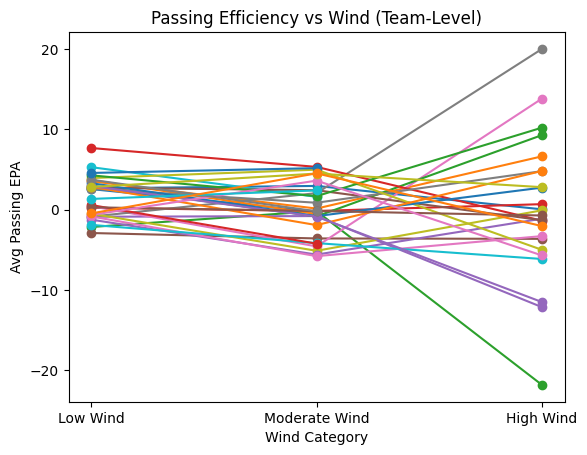

In [69]:
epa_by_wind = combined.groupby(["focus_team", "wind_bucket"])[
    ["passing_epa", "rushing_epa"]
].mean().reset_index()

for team in teams:
    team_df = epa_by_wind[epa_by_wind["focus_team"] == team]
    plt.plot(team_df["wind_bucket"], team_df["passing_epa"], marker="o")

plt.xlabel("Wind Category")
plt.ylabel("Avg Passing EPA")
plt.title("Passing Efficiency vs Wind (Team-Level)")
plt.show()

Once again lets focus on our three teams:


C:\Users\erana\AppData\Local\Temp\ipykernel_38504\3654609426.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  epa_by_wind = combined.groupby(["focus_team", "wind_bucket"])[


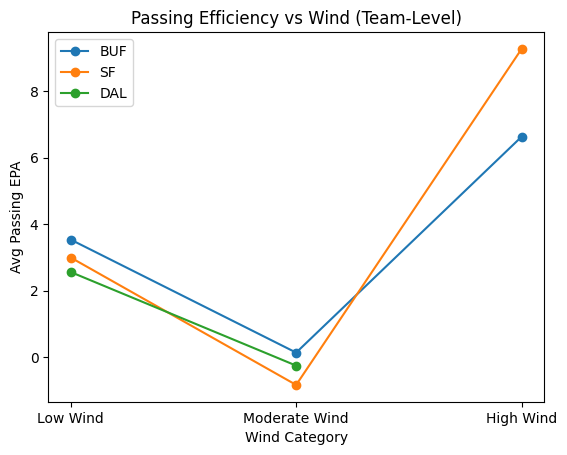

In [70]:
epa_by_wind = combined.groupby(["focus_team", "wind_bucket"])[
    ["passing_epa", "rushing_epa"]
].mean().reset_index()

for team in team_focus:
    team_df = epa_by_wind[epa_by_wind["focus_team"] == team]
    plt.plot(team_df["wind_bucket"], team_df["passing_epa"], marker="o", label=team)

plt.xlabel("Wind Category")
plt.ylabel("Avg Passing EPA")
plt.title("Passing Efficiency vs Wind (Team-Level)")
plt.legend()
plt.show()

-- TODO Improve analysis

We have some interesting results... 

low wind higher passing EPA than moderate wind, which is expected, but then there is a big spike in passing EPA for high wind?

Lets check these records, this could be due to a low volume of games in this category

In [90]:
wind_games_focused = combined[combined["focus_team"].isin(team_focus)] #focusing on our example teams
wind_games_focused = wind_games_focused.groupby(["focus_team", "wind_bucket"]).size().reset_index(name='count')

wind_games_focused

C:\Users\erana\AppData\Local\Temp\ipykernel_38504\2814362106.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_games_focused = wind_games_focused.groupby(["focus_team", "wind_bucket"]).size().reset_index(name='count')


,focus_team,wind_bucket,count
0,BUF,Low Wind,100
1,BUF,Moderate Wind,48
2,BUF,High Wind,6
3,DAL,Low Wind,141
4,DAL,Moderate Wind,15
5,DAL,High Wind,0
6,SF,Low Wind,120
7,SF,Moderate Wind,30
8,SF,High Wind,2


As we can see, for SF for example there is only 2 High Wind games compared to the 120 Low Wind and 30 Moderate Wind games.

This can explain our unsual results that there is a spike in Passing EPA for high wind games as our sample size is too low to properly exemplify a trend.

The Law of Small Numbers ! :)





Lets try analyzing this another way 
Lets recreate this distribution with the entire dataset but only evaluating the (focus_team & wind_Bucket) buckets with a reliable amount of data.

In [113]:
wind_counts_full = combined.groupby(["focus_team", "wind_bucket"]).size().reset_index(name="n_games").sort_values("n_games")

wind_counts_full

C:\Users\erana\AppData\Local\Temp\ipykernel_38504\416494079.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_counts_full = combined.groupby(["focus_team", "wind_bucket"]).size().reset_index(name="n_games").sort_values("n_games")


,focus_team,wind_bucket,n_games
5,ATL,High Wind,0
26,DAL,High Wind,0
50,LAC,High Wind,0
41,IND,High Wind,0
53,LAR,High Wind,0
...,...,...,...
0,ARI,Low Wind,138
30,DET,Low Wind,140
60,MIN,Low Wind,140
24,DAL,Low Wind,141


In [115]:
# TODO adjust minimum games threshold for reliable data

MIN_N = 11
wind_counts_full["reliable"] = wind_counts_full["n_games"] >= MIN_N

#merge counts back with original dataset and filter to only reliable data
combined_reliable = combined.merge(
    wind_counts_full[["focus_team", "wind_bucket", "reliable"]],
    on=["focus_team", "wind_bucket"],
    how="left"
)
combined_reliable = combined_reliable[combined_reliable["reliable"]]

C:\Users\erana\AppData\Local\Temp\ipykernel_38504\3492989698.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  epa_by_wind = combined_reliable.groupby(["focus_team", "wind_bucket"])["passing_epa"].mean().reset_index()


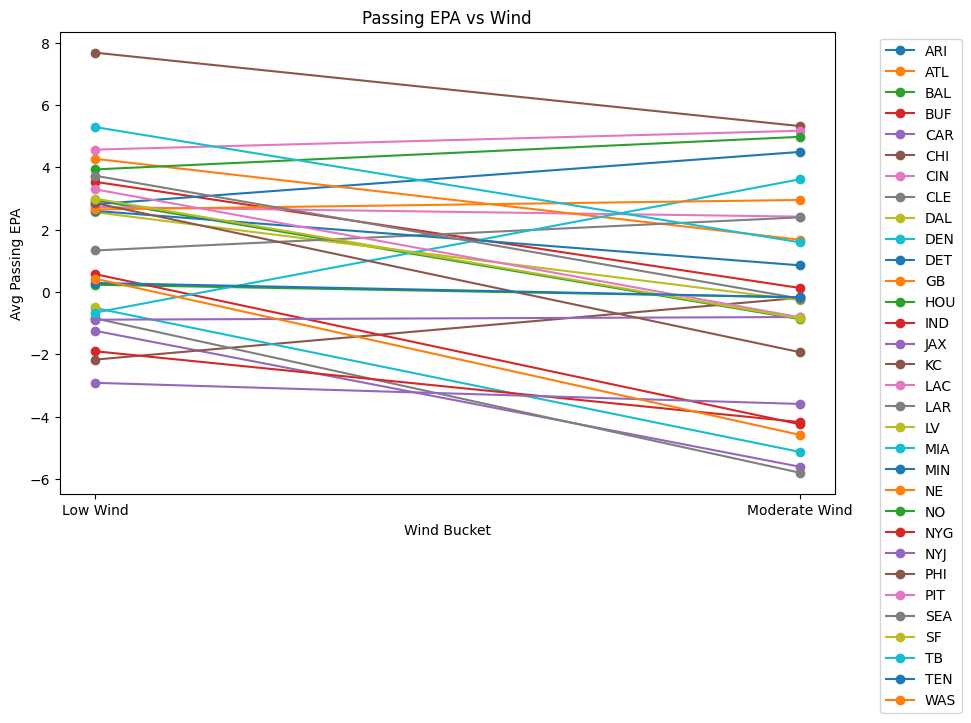

In [116]:
epa_by_wind = combined_reliable.groupby(["focus_team", "wind_bucket"])["passing_epa"].mean().reset_index()

teams = epa_by_wind["focus_team"].unique()

plt.figure(figsize=(10,6))
for team in teams:
    team_df = epa_by_wind[epa_by_wind["focus_team"] == team]
    plt.plot(team_df["wind_bucket"], team_df["passing_epa"], marker="o", label=team)

plt.xlabel("Wind Bucket")
plt.ylabel("Avg Passing EPA")
plt.title("Passing EPA vs Wind")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

-- TODO Improve analysis

After removing the focus_team & wind_bucket buckets with too low of a sample size (labeled unreliable in our dataset) We can see that overall there is a a general negative correlation between wind and pass EPA